In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
PROJECT_DIR = os.path.expanduser("~/wildfire_burn_scars_segmentation")
print(PROJECT_DIR)
sys.path.append(os.path.join(PROJECT_DIR, 'src'))

/home/rgura001/wildfire_burn_scars_segmentation


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
RESULTS_DIR = f"{PROJECT_DIR}/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512"
running_training_stats_path = os.path.join(RESULTS_DIR, 'plots', 'train', 'running_training_stats.csv')

100


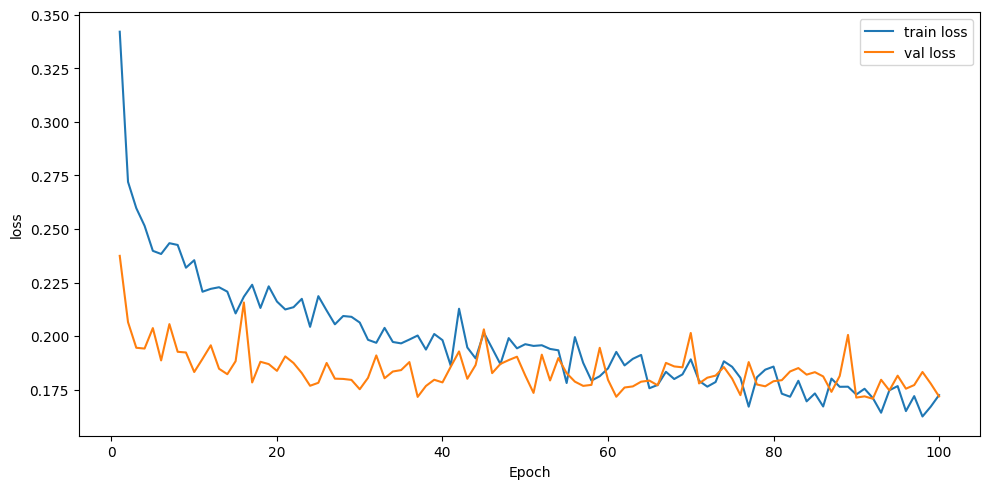

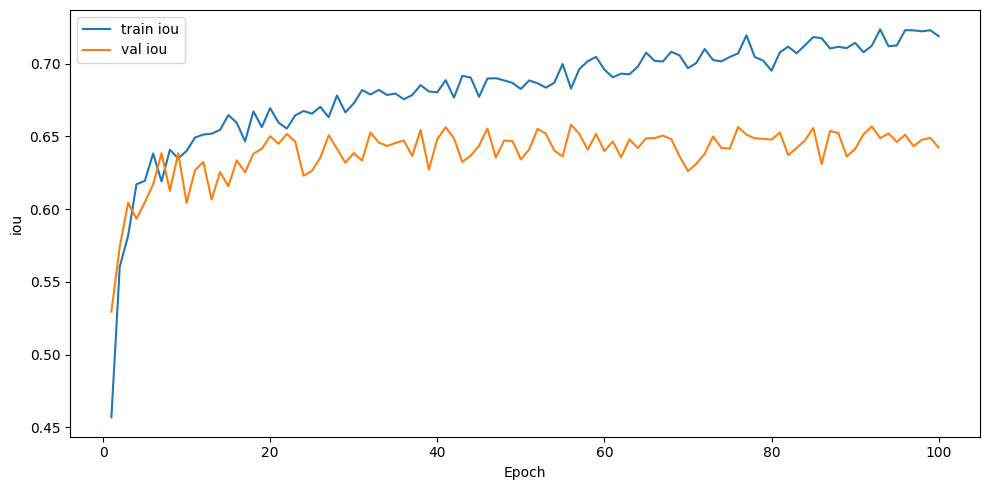

In [7]:
from utils import plot_training_stats
running_training_stats = pd.read_csv(running_training_stats_path)
print(len(running_training_stats))
plot_training_stats(running_training_stats, 
					save=True, save_dir=os.path.join(RESULTS_DIR, 'plots', 'train'),
					show=True)

['/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0001.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0010.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0020.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0030.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0040.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0050.npz', '/home/rgura001/wildfire_burn_scars_segmentation/results/simpletune-1/nvidia_segformer-b0-finetuned-ade-512-512/predictions/epoch0060.npz', '/home/rgura001/wil

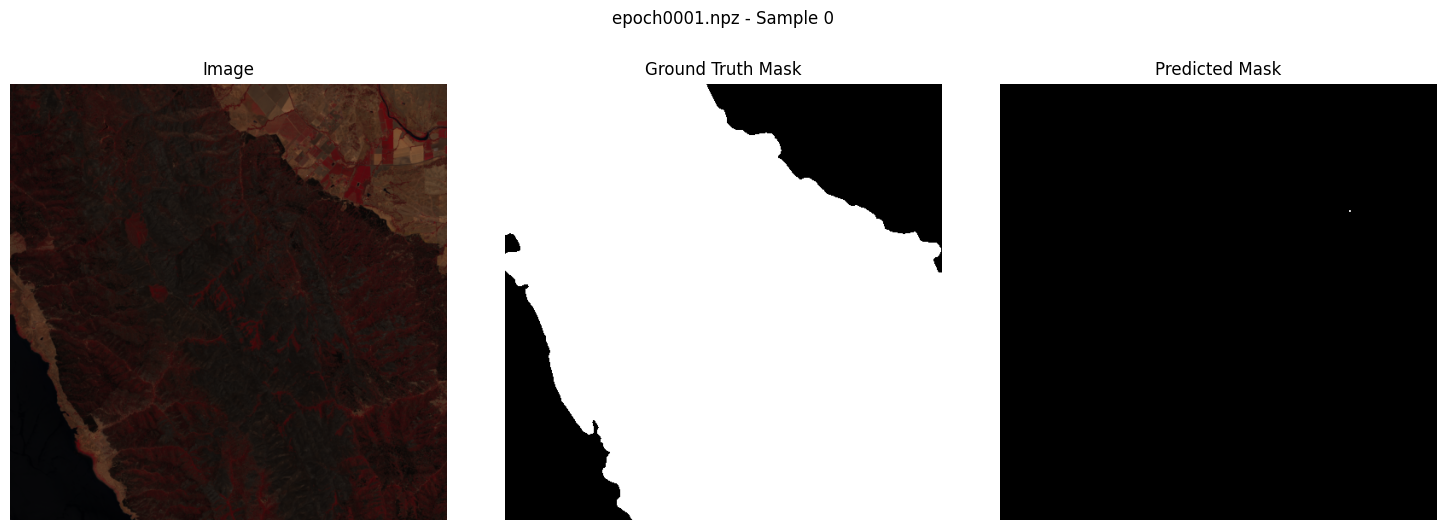

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


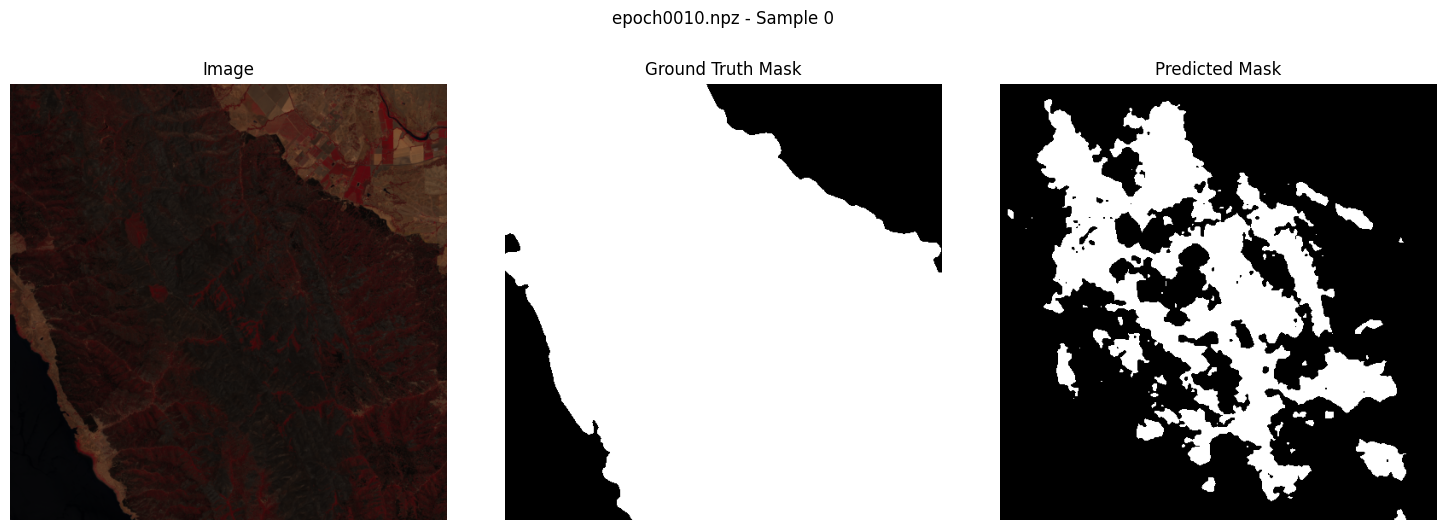

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


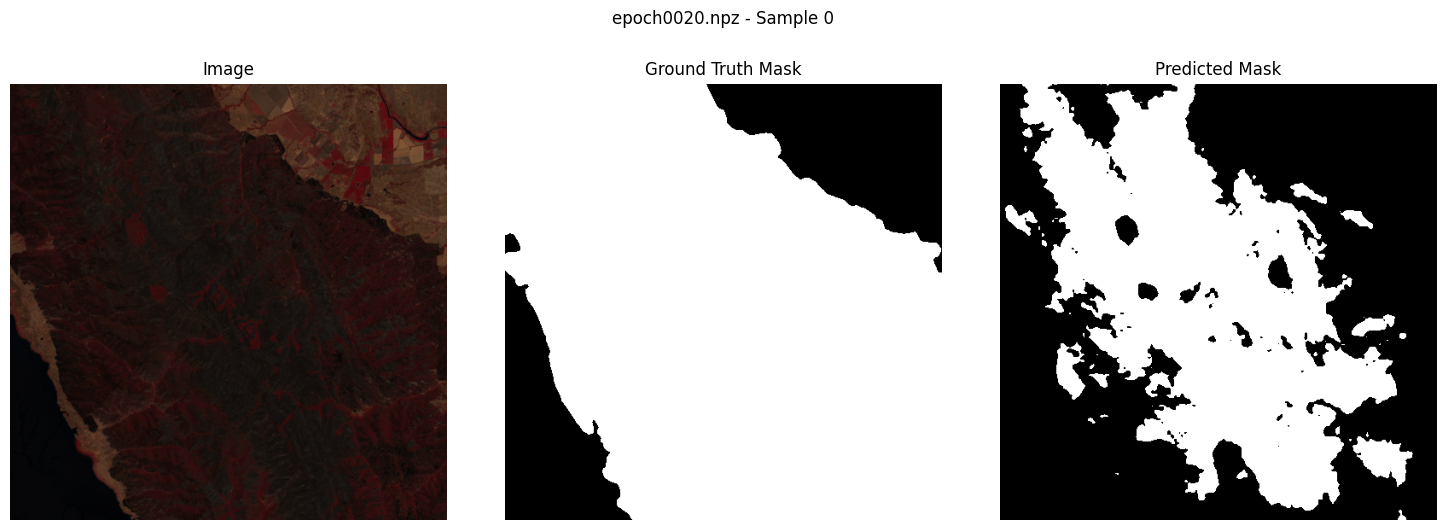

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


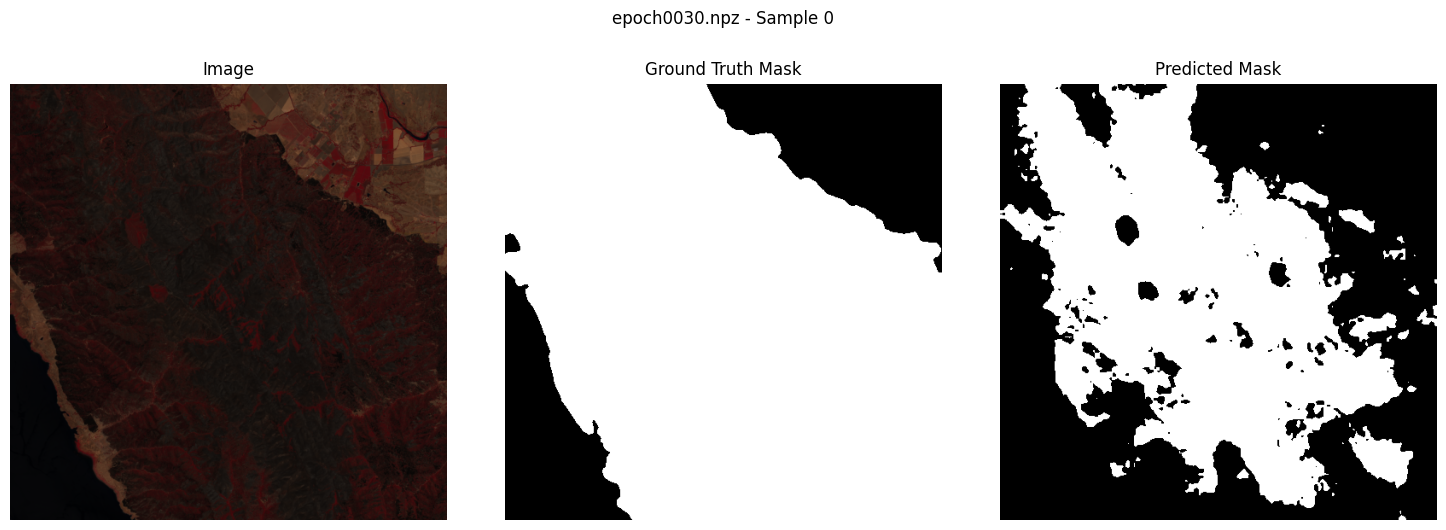

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


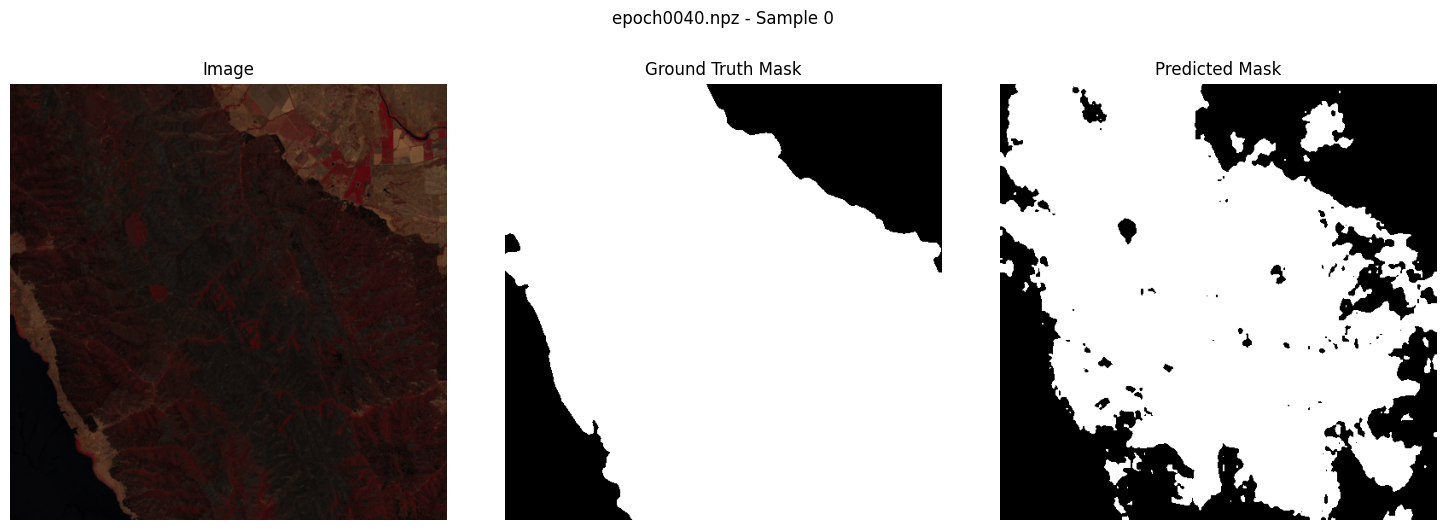

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


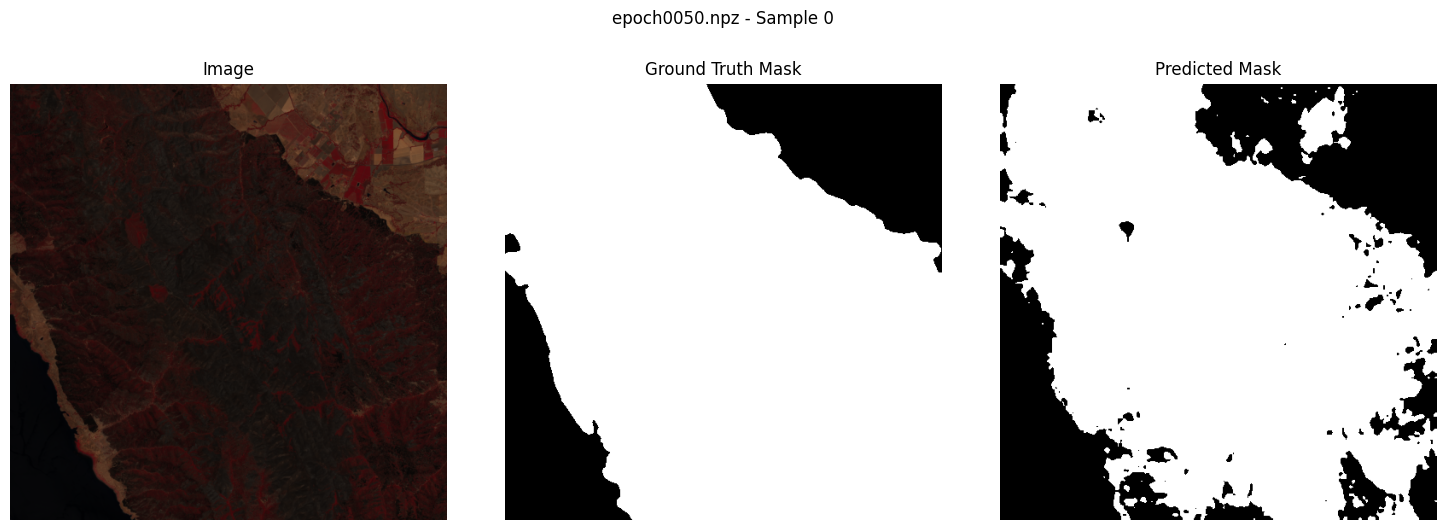

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


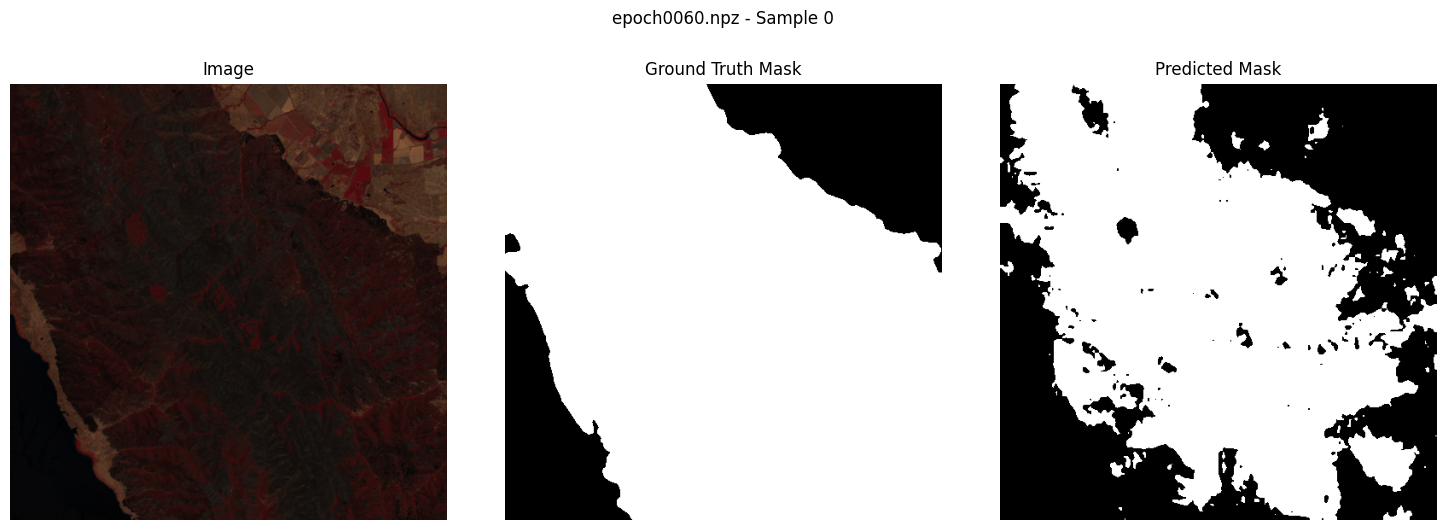

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


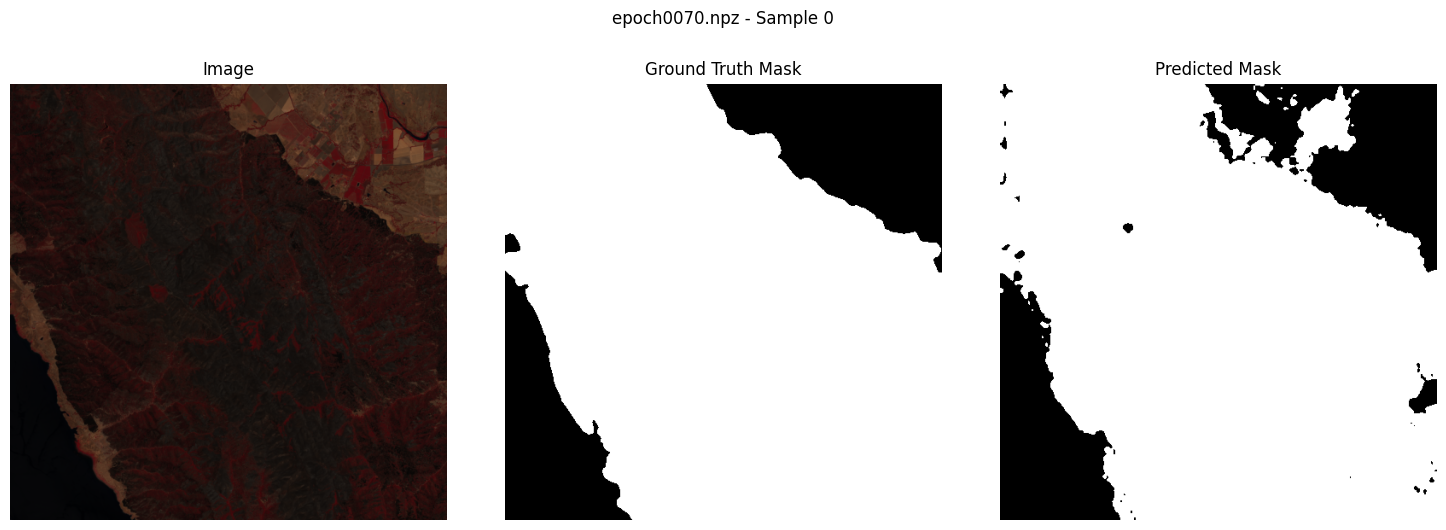

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


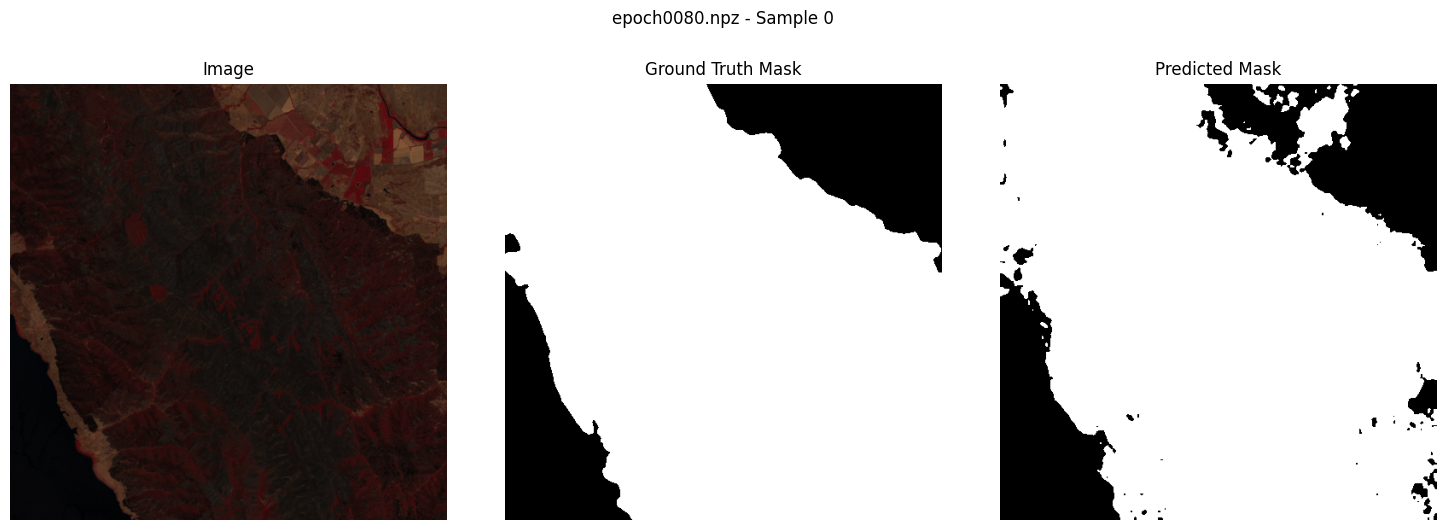

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


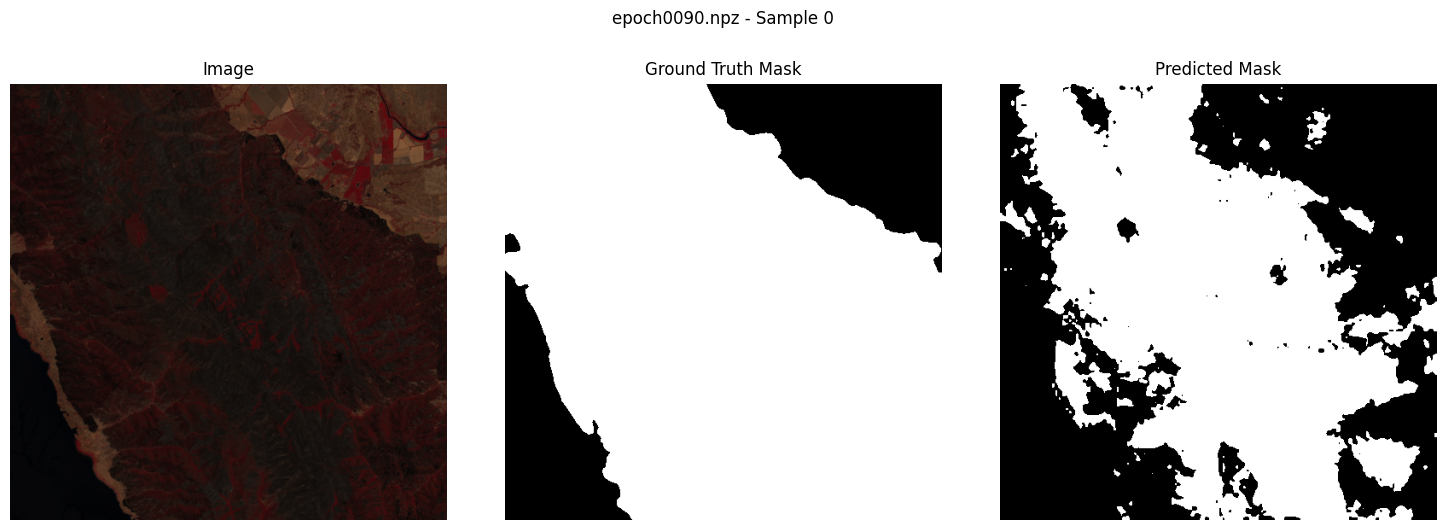

(4, 3, 512, 512) (4, 512, 512) (4, 512, 512)


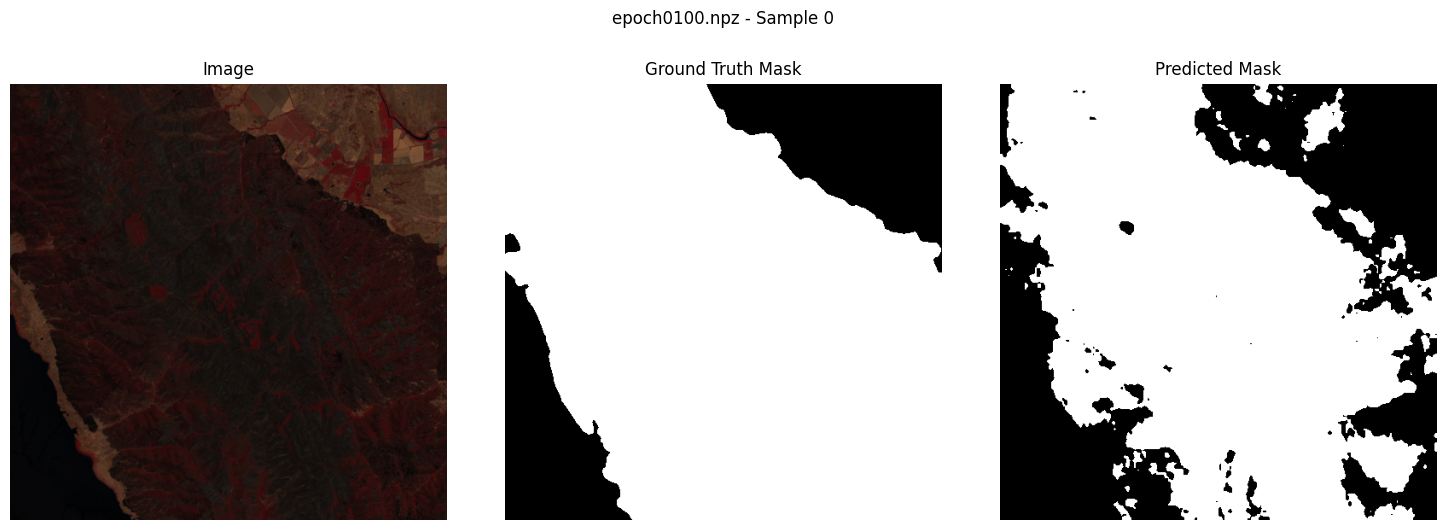

In [6]:
from visualize.plot_data import plot_datapoint_with_prediction

predictions_dir = os.path.join(RESULTS_DIR, 'predictions')
prediction_filepaths = sorted([os.path.join(predictions_dir, f) for f in os.listdir(predictions_dir)])
print(prediction_filepaths)

# Read .npz file
for filepath in prediction_filepaths:
	filestr = os.path.basename(filepath)
	data = np.load(filepath)
	images = data['images']
	masks = data['masks']
	preds = data['preds']
	print(images.shape, masks.shape, preds.shape)
	
	for i in range(images.shape[0])[:1]:
		image = images[i]
		mask = masks[i]
		pred = preds[i]
		plot_datapoint_with_prediction(image.transpose(1, 2, 0), mask, pred, show=True, titlestr=f"{filestr} - Sample {i}")